<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,62.322330,98.773030,80.463772,37.470575,5.661756,294.691463,287.313795,7.377668
1,0.0,1.0,54.359535,72.715689,26.550441,54.079073,12.843482,230.548221,217.067668,13.480552
2,0.0,2.0,99.341430,82.026973,20.905487,63.305849,-21.408697,254.171042,277.017327,-22.846284
3,0.0,3.0,83.042859,78.941006,46.078735,85.083248,9.913734,313.059582,303.178798,9.880784
4,0.0,4.0,36.942809,44.163179,60.706106,89.796576,-4.196081,237.412590,239.797747,-2.385157
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.570389,27.164242,42.329136,84.113876,-4.322456,235.855188,241.374405,-5.519218
249996,999.0,246.0,45.154378,55.923471,43.282997,52.564320,-7.046332,199.878833,206.252544,-6.373710
249997,999.0,247.0,75.976610,60.927430,99.896832,67.628388,-7.349719,307.079542,315.332285,-8.252743
249998,999.0,248.0,37.257233,59.621953,90.274463,50.140816,-9.002277,238.292188,247.124229,-8.832041


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,62.322330,98.773030,80.463772,37.470575,5.661756,294.691463,287.313795,7.377668
1,0.0,1.0,54.359535,72.715689,26.550441,54.079073,12.843482,230.548221,217.067668,13.480552
2,0.0,2.0,99.341430,82.026973,20.905487,63.305849,-21.408697,254.171042,277.017327,-22.846284
3,0.0,3.0,83.042859,78.941006,46.078735,85.083248,9.913734,313.059582,303.178798,9.880784
4,0.0,4.0,36.942809,44.163179,60.706106,89.796576,-4.196081,237.412590,239.797747,-2.385157
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.570389,27.164242,42.329136,84.113876,-4.322456,235.855188,241.374405,-5.519218
249996,999.0,246.0,45.154378,55.923471,43.282997,52.564320,-7.046332,199.878833,206.252544,-6.373710
249997,999.0,247.0,75.976610,60.927430,99.896832,67.628388,-7.349719,307.079542,315.332285,-8.252743
249998,999.0,248.0,37.257233,59.621953,90.274463,50.140816,-9.002277,238.292188,247.124229,-8.832041


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,62.322330,98.773030,80.463772,37.470575,5.661756,294.691463,287.313795,7.377668
1,0.0,1.0,54.359535,72.715689,26.550441,54.079073,12.843482,230.548221,217.067668,13.480552
2,0.0,2.0,99.341430,82.026973,20.905487,63.305849,-21.408697,254.171042,277.017327,-22.846284
3,0.0,3.0,83.042859,78.941006,46.078735,85.083248,9.913734,313.059582,303.178798,9.880784
4,0.0,4.0,36.942809,44.163179,60.706106,89.796576,-4.196081,237.412590,239.797747,-2.385157
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.570389,27.164242,42.329136,84.113876,-4.322456,235.855188,241.374405,-5.519218
249996,999.0,246.0,45.154378,55.923471,43.282997,52.564320,-7.046332,199.878833,206.252544,-6.373710
249997,999.0,247.0,75.976610,60.927430,99.896832,67.628388,-7.349719,307.079542,315.332285,-8.252743
249998,999.0,248.0,37.257233,59.621953,90.274463,50.140816,-9.002277,238.292188,247.124229,-8.832041


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    62.322330  98.773030  80.463772  37.470575   5.661756   
      1.0    54.359535  72.715689  26.550441  54.079073  12.843482   
      2.0    99.341430  82.026973  20.905487  63.305849 -21.408697   
      3.0    83.042859  78.941006  46.078735  85.083248   9.913734   
      4.0    36.942809  44.163179  60.706106  89.796576  -4.196081   
...                ...        ...        ...        ...        ...   
999.0 245.0  76.570389  27.164242  42.329136  84.113876  -4.322456   
      246.0  45.154378  55.923471  43.282997  52.564320  -7.046332   
      247.0  75.976610  60.927430  99.896832  67.628388  -7.349719   
      248.0  37.257233  59.621953  90.274463  50.140816  -9.002277   
      249.0  97.317567  47.334098  46.344292  85.100951   1.483504   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    294.691463  287.313795   7.377668  
      1.0    230.548221  217.067668  13.480552  
      2.0    254.171042  277.017327 -22.846284  
      3.0    313.059582  303.178798   9.880784  
      4.0    237.412590  239.797747  -2.385157  
...                 ...         ...        ...  
999.0 245.0  235.855188  241.374405  -5.519218  
      246.0  199.878833  206.252544  -6.373710  
      247.0  307.079542  315.332285  -8.252743  
      248.0  238.292188  247.124229  -8.832041  
      249.0  287.580411  287.207910   0.372502  

[250000 rows x 8 columns]

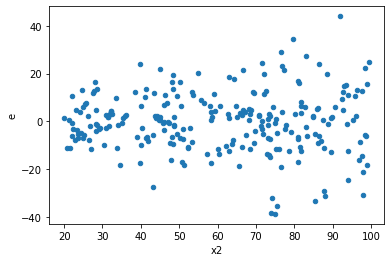

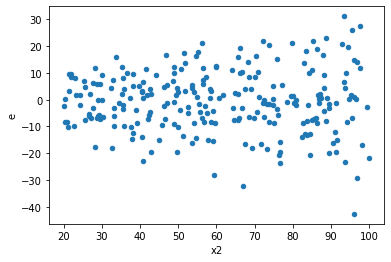

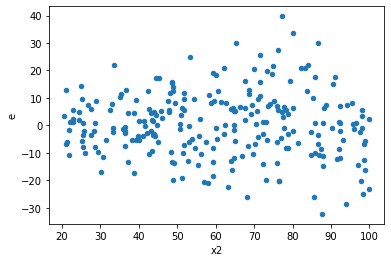

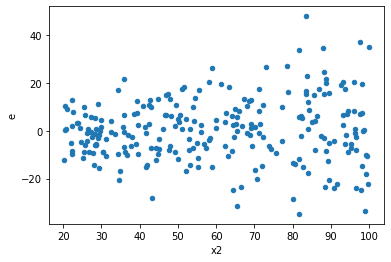

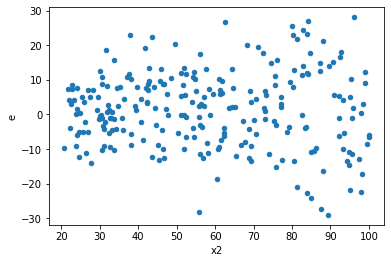

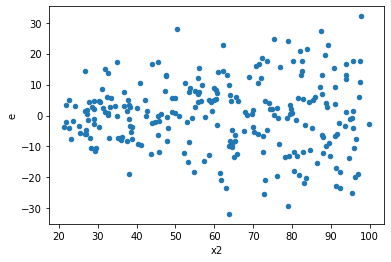

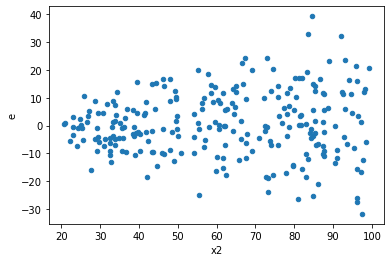

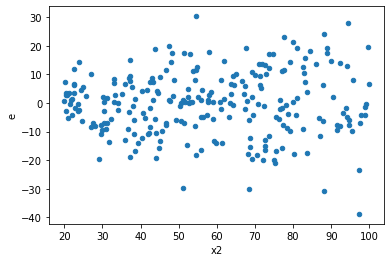

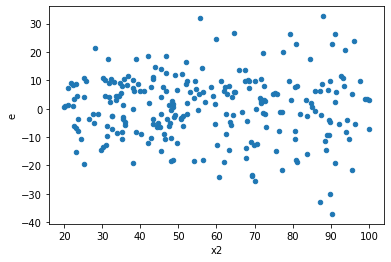

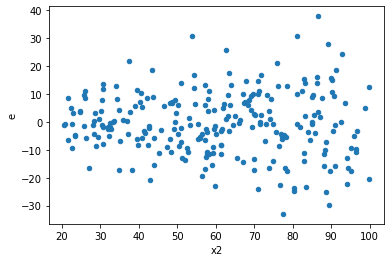

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,11123.444834625638,12609.990103532697,115.86921702735039,131.3540635784656,1.1336407283002532,0.5400734691334617,0.7299632654332692,0.27003673456673083,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,12473.383723701121,13152.458781589521,129.93108045522,137.00477897489085,1.0544419279427815,0.7956256432384192,0.6021871783807904,0.3978128216192096,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,10810.546634835413,15856.345574847737,112.60986077953555,165.17026640466392,1.4667478075301918,0.06204106452121394,0.968979467739393,0.03102053226060697,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,9690.01669283545,13578.516945321151,100.9376738837026,141.4428848470953,1.4012893244405613,0.10003028338445996,0.94998485830777,0.05001514169222998,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,10389.785143511603,13704.722781623615,108.22692857824586,142.757528975246,1.3190573811030333,0.17671541495850152,0.9116422925207492,0.08835770747925076,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,10762.773843269691,13519.14688523973,112.11222753405929,140.8244467212472,1.2561024771224463,0.265738911252166,0.867130544373917,0.132869455626083,Reject005=1 : Homoscedasticity
6.0,96.0,96.0,10310.218900436503,12500.34308703602,107.39811354621357,130.21190715662522,1.2124226660703388,0.34697862640750543,0.8265106867962473,0.17348931320375272,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,12423.453520332785,13569.779321731883,129.4109741701332,141.35186793470712,1.0922711063814075,0.6663336376400366,0.6668331811799817,0.3331668188200183,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,8786.272465656026,18319.06950999377,91.52367151725026,190.82364072910175,2.084964879202159,0.00038365512700777593,0.9998081724364961,0.00019182756350388797,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,11123.444834625638,12609.990103532697,115.86921702735039,131.3540635784656,1.1336407283002532,0.5400734691334617,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,12473.383723701121,13152.458781589521,129.93108045522,137.00477897489085,1.0544419279427815,0.7956256432384192,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,10810.546634835413,15856.345574847737,112.60986077953555,165.17026640466392,1.4667478075301918,0.06204106452121394,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,9690.01669283545,13578.516945321151,100.9376738837026,141.4428848470953,1.4012893244405613,0.10003028338445996,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,10389.785143511603,13704.722781623615,108.22692857824586,142.757528975246,1.3190573811030333,0.17671541495850152,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,10762.773843269691,13519.14688523973,112.11222753405929,140.8244467212472,1.2561024771224463,0.265738911252166,Reject005=1 : Homoscedasticity
6.0,96.0,96.0,10310.218900436503,12500.34308703602,107.39811354621357,130.21190715662522,1.2124226660703388,0.34697862640750543,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,12423.453520332785,13569.779321731883,129.4109741701332,141.35186793470712,1.0922711063814075,0.6663336376400366,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,8786.272465656026,18319.06950999377,91.52367151725026,190.82364072910175,2.084964879202159,0.00038365512700777593,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    566
Reject005=1 : Homoscedasticity      434
Name: Result_test, dtype: int64